In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np

In [2]:
# Getting data
df1 = pd.read_csv('survey.csv')
df2 = pd.read_csv('steps.csv', sep = ";")


In [3]:
#merge the datafiles 
df = pd.merge(df1, df2, on = 'id') #"id" is the common identifier


In [4]:
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)
df_mean = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)
df['mean_steps'] = df_mean
df.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## Relation between three numerical variables - height, weight, mean steps

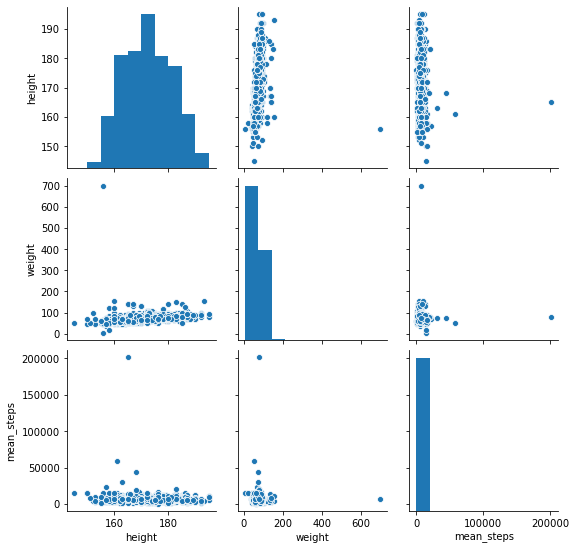

In [13]:
scatterplotmatrix = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(scatterplotmatrix)
plt.show()

*Mean steps with height*

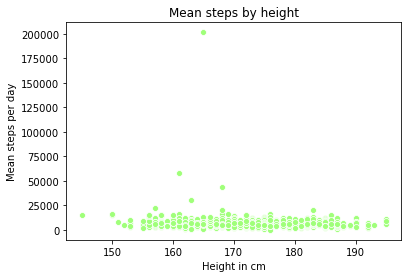

In [14]:
sns.scatterplot(x=df["height"], y = df["mean_steps"], color ="#a0ff7a")
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')
plt.title('Mean steps by height')
plt.show()
plt.show()

*Mean steps with weight*

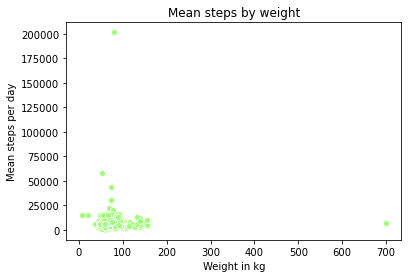

In [15]:
sns.scatterplot(x=df["weight"], y = df["mean_steps"], color ="#a0ff7a")
plt.xlabel('Weight in kg') 
plt.ylabel('Mean steps per day')
plt.title('Mean steps by weight')
plt.show()

*Correlation of the 3 variables: height, weight and mean steps*

In [6]:
corr = df[['height', 'weight', 'mean_steps']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,height,weight,mean_steps
height,1.000000,0.265138,-0.069667
weight,0.265138,1.000000,-0.016293
mean_steps,-0.069667,-0.016293,1.000000


*Calculating Pearson*

In [9]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(corr['height'],corr['mean_steps']))
print(pearsonr(corr['weight'],corr['mean_steps']))

(-0.769988324004419, 0.44052399588362046)
(-0.6822222733836628, 0.5220272850747725)


The output gives us two numbers: r which is -0.769988324004419 & -0.682222273383662 , and p which is 0.44052399588362046 & 0.5220272850747725

Both correlations are not significant (p > 0.1).

## Relation between categorical and numerical variable - gender and mean steps

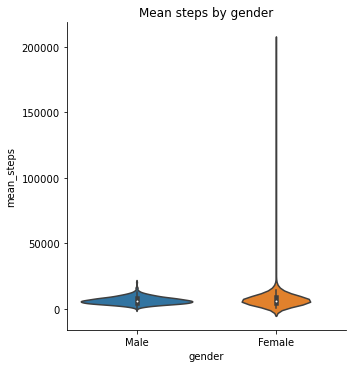

In [10]:
sns.catplot(x="gender", y="mean_steps", kind="violin", data=df)
plt.title('Mean steps by gender')
plt.show()

The graph shows that the distributions are almost identical but there are a very high number of steps from females.

## Relation between two categorical variables - gender and the city

The cross table of the two categorical variables

In [11]:
pd.crosstab(df["city"], df["gender"], normalize="columns", margins=True)

gender,Female,Male,All
city,,,
Bordeaux,0.128736,0.147773,0.138859
Lille,0.581609,0.510121,0.543595
Lyon,0.151724,0.153846,0.152853
Montpellier,0.137931,0.188259,0.164693


The graph of the two categorical variables

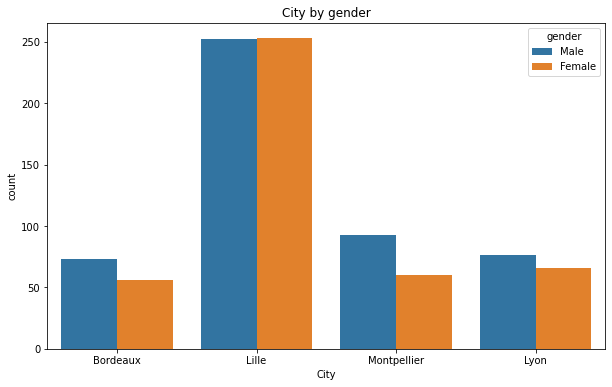

In [12]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(data = df, x = "city", hue = "gender") #create the plot
plt.xlabel("City")
plt.title("City by gender")
plt.show()

In Lille, the proportion of male and female is very similar, in the other 3 cities men dominate more